In [25]:
import xlwings as xw
import pandas as pd
import numpy as np
import string
from tqdm import tqdm
import time
import sys
import os
import matplotlib.pyplot as plt

from scipy.stats.mstats import winsorize
import seaborn as sns

In [26]:
from sklearn.metrics import get_scorer_names
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor

# 1 - VBA Automation

In [57]:
#app = xw.App(visible=True)
opgee_file = xw.books.open('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/OPGEE_3.0b_BETA.xlsm')
inputs_file = pd.read_excel('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/field_data_for_opgee.xlsx')

In [18]:
all_letters = [letter for letter in string.ascii_uppercase]
double_letters = []
for first_letter in tqdm(all_letters):
    for second_letter in all_letters:
        double_letters.append(first_letter + second_letter)
all_letters += double_letters
all_letters = all_letters[all_letters.index('I'):all_letters.index('SM')+1]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26008.09it/s]


In [59]:
all_fields = inputs_file[inputs_file['production'] != 0].reset_index(drop = True)
all_fields.shape[0]

6098

In [77]:
inputs_sheet = opgee_file.sheets('Inputs')
results_sheet = opgee_file.sheets('Results')
production_methods_default = inputs_sheet.range('G9:G17').value
production_methods_default

[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

## 1.1 - Single Field Attempt 

In [40]:
j = 56
inputs_sheet.range('I9:I17').value = production_methods_default
inputs_sheet.range('I20').value = all_fields.loc[j, 'country_name']
inputs_sheet.range('I21').value = all_fields.loc[j, 'field_name']
inputs_sheet.range('I22').value = all_fields.loc[j, 'field_age']
inputs_sheet.range('I23').value = all_fields.loc[j, 'field_depth']
inputs_sheet.range('I24').value = all_fields.loc[j, 'production']
inputs_sheet.range('I31').value = all_fields.loc[j, 'offshore']
inputs_sheet.range('I34').value = all_fields.loc[j, 'api']
inputs_sheet.range('I42').value = all_fields.loc[j, 'h2s']

In [41]:
inputs_sheet.range('C2').value = 2

In [42]:
trial_macro = opgee_file.macro('BulkAssessment.UltraBulk_assessment')
trial_macro()

In [43]:
emission = results_sheet.range('I193').value
emission

6.455794611911903

## 1.2 - Multiple Fields

In [78]:
n_fields = 499

x_data = all_fields.loc[:n_fields, ['country_name', 'field_name', 'field_age', 'field_depth', 'production', 'offshore', 'api', 'h2s']]

for i in tqdm(range(n_fields)):
    col = all_letters[i]
    inputs_sheet.range(f'{col}9:{col}17').value = production_methods_default
    inputs_sheet.range(f'{col}20').value = all_fields.loc[i, 'country_name']
    inputs_sheet.range(f'{col}21').value = all_fields.loc[i, 'field_name']
    inputs_sheet.range(f'{col}22').value = all_fields.loc[i, 'field_age']
    inputs_sheet.range(f'{col}23').value = all_fields.loc[i, 'field_depth']
    inputs_sheet.range(f'{col}24').value = all_fields.loc[i, 'production']
    inputs_sheet.range(f'{col}31').value = all_fields.loc[i, 'offshore']
    inputs_sheet.range(f'{col}34').value = all_fields.loc[i, 'api']
    inputs_sheet.range(f'{col}42').value = all_fields.loc[i, 'h2s']

100%|████████████████████████████████████████████████████████████████████████████████| 499/499 [31:45<00:00,  3.82s/it]


In [79]:
inputs_sheet.range('C2').value = n_fields + 1

In [80]:
start_time = time.time()
trial_macro = opgee_file.macro('BulkAssessment.UltraBulk_assessment')
trial_macro()
end_time = time.time()
print(f'Total execution time for {n_fields+1} fields: {(end_time - start_time)/60} minutes')

Total execution time for 499 fields: 222.63574557701747 minutes


In [85]:
x_data = all_fields.loc[:n_fields-1, ['country_name', 'field_name', 'field_age', 'field_depth', 'production', 'offshore', 'api', 'h2s']]
end_bound = all_letters[n_fields-1]
emissions = results_sheet.range(f'I193:{end_bound}193').value
x_data['Emission'] = emissions

In [86]:
x_data.head()

,country_name,field_name,field_age,field_depth,production,offshore,api,h2s,Emission
0,United Kingdom,Alba,0.0,6000.65625,44000.0,1,19.4,1.25,5.427825
1,United Kingdom,Alba,1.0,6000.65625,69500.0,1,19.4,1.25,5.419328
2,United Kingdom,Alba,2.0,6000.65625,69930.0,1,19.4,1.25,5.425938
3,United Kingdom,Alba,3.0,6000.65625,90865.0,1,19.4,1.25,5.433522
4,United Kingdom,Alba,4.0,6000.65625,80910.0,1,19.4,1.25,5.446432


In [88]:
opgee_file.close()

## 1.3 - Multiple Iterations

In [95]:
opgee_file = xw.books.open('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/OPGEE_3.0b_BETA.xlsm')

In [91]:
all_letters = [letter for letter in string.ascii_uppercase]
double_letters = []
for first_letter in tqdm(all_letters):
    for second_letter in all_letters:
        double_letters.append(first_letter + second_letter)
all_letters += double_letters
all_letters = all_letters[all_letters.index('I'):all_letters.index('SM')+1]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 12994.75it/s]


In [53]:
n_iterations = 2
n_fields = 2
running_times = []

x_data = all_fields.loc[:n_fields*n_iterations-1, ['country_name', 'field_name', 'field_age', 'field_depth', 'production', 'offshore', 'api', 'h2s']]
x_data['Emission'] = 0

for j in tqdm(range(n_iterations)):
    
    opgee_file = xw.books.open('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/OPGEE_3.0b_BETA.xlsm')
    inputs_file = pd.read_excel('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/field_data_for_opgee.xlsx')
    inputs_sheet = opgee_file.sheets('Inputs')
    results_sheet = opgee_file.sheets('Results')
    production_methods_default = inputs_sheet.range('G9:G17').value
    
    for i in range(n_fields):
        col = all_letters[i]
        inputs_sheet.range(f'{col}9:{col}17').value = production_methods_default
        inputs_sheet.range(f'{col}20').value = all_fields.loc[i + j*n_fields, 'country_name']
        inputs_sheet.range(f'{col}21').value = all_fields.loc[i + j*n_fields, 'field_name']
        inputs_sheet.range(f'{col}22').value = all_fields.loc[i + j*n_fields, 'field_age']
        inputs_sheet.range(f'{col}23').value = all_fields.loc[i + j*n_fields, 'field_depth']
        inputs_sheet.range(f'{col}24').value = all_fields.loc[i + j*n_fields, 'production']
        inputs_sheet.range(f'{col}31').value = all_fields.loc[i + j*n_fields, 'offshore']
        inputs_sheet.range(f'{col}34').value = all_fields.loc[i + j*n_fields, 'api']
        inputs_sheet.range(f'{col}42').value = all_fields.loc[i + j*n_fields, 'h2s']
        
    inputs_sheet.range('C2').value = n_fields + 1
    
    start_time = time.time()
    trial_macro = opgee_file.macro('BulkAssessment.UltraBulk_assessment')
    trial_macro()
    end_time = time.time()
    running_times.append((end_time - start_time)/60)
    
    end_bound = all_letters[n_fields-1]
    emissions = results_sheet.range(f'I193:{end_bound}193').value
    x_data.loc[n_fields*j:n_fields*(j+1)-1,'Emission'] = emissions
    
    opgee_file.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [03:18<00:00, 99.31s/it]


In [55]:
x_data

,country_name,field_name,field_age,field_depth,production,offshore,api,h2s,Emission
0,United Kingdom,Alba,0.0,6000.65625,44000.0,1,19.4,1.25,5.427825
1,United Kingdom,Alba,1.0,6000.65625,69500.0,1,19.4,1.25,5.419328
2,United Kingdom,Alba,2.0,6000.65625,69930.0,1,19.4,1.25,5.425938
3,United Kingdom,Alba,3.0,6000.65625,90865.0,1,19.4,1.25,5.433522


In [56]:
emissions

[5.425937557418119, 5.433522087682802]

## 1.4 - Null Production Check

In [118]:
app = xw.App(visible=False)
opgee_file = xw.books.open('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/OPGEE_3.0b_BETA.xlsm')
inputs_file = pd.read_excel('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/field_data_for_opgee.xlsx')

In [119]:
inputs_sheet = opgee_file.sheets('Inputs')
results_sheet = opgee_file.sheets('Results')
production_methods_default = inputs_sheet.range('G9:G17').value
production_methods_default

[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [120]:
zero_fields = inputs_file[inputs_file['production'] == 0].reset_index(drop = True)
zero_fields.shape[0]

1629

In [141]:
zero_fields['production'] = 0.00000000000000001

In [142]:
j = 40
inputs_sheet.range('I9:I17').value = production_methods_default
inputs_sheet.range('I20').value = zero_fields.loc[j, 'country_name']
inputs_sheet.range('I21').value = zero_fields.loc[j, 'field_name']
inputs_sheet.range('I22').value = zero_fields.loc[j, 'field_age']
inputs_sheet.range('I23').value = zero_fields.loc[j, 'field_depth']
inputs_sheet.range('I24').value = zero_fields.loc[j, 'production']
inputs_sheet.range('I31').value = zero_fields.loc[j, 'offshore']
inputs_sheet.range('I34').value = zero_fields.loc[j, 'api']
inputs_sheet.range('I42').value = zero_fields.loc[j, 'h2s']

inputs_sheet.range('C2').value = 2

In [143]:
trial_macro = opgee_file.macro('BulkAssessment.UltraBulk_assessment')
trial_macro()

In [144]:
emission = results_sheet.range('I193').value
emission

4.051574596234097e+17

## 1.5 - Final Code

In [15]:
app = xw.App(visible=False)
opgee_file = xw.books.open('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/OPGEE_3.0b_BETA.xlsm')
inputs_file = pd.read_excel('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/field_data_for_opgee.xlsx')
all_fields = inputs_file[inputs_file['production'] != 0].reset_index(drop = True)

inputs_sheet = opgee_file.sheets('Inputs')
results_sheet = opgee_file.sheets('Results')
production_methods_default = inputs_sheet.range('G9:G17').value

all_letters = [letter for letter in string.ascii_uppercase]
double_letters = []
for first_letter in tqdm(all_letters):
    for second_letter in all_letters:
        double_letters.append(first_letter + second_letter)
all_letters += double_letters
all_letters = all_letters[all_letters.index('I'):all_letters.index('SM')+1]

100%|███████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 26032.92it/s]


In [35]:
n_iterations = 1
n_fields = 499
running_times = []

for j in tqdm(range(n_iterations)):
    all_files = os.listdir()
    already_opgee = pd.DataFrame()
    last_index = 0

    for i in range(len(all_files)):
        if all_files[i][:10] == 'OPGEE_Data':
            last_index += 1
            already_opgee = pd.concat([already_opgee, pd.read_csv(all_files[i])])

    shift = already_opgee.shape[0]
    
    if (all_fields.shape[0] - shift - n_fields)//499 <= 0:
        n_fields = (all_fields.shape[0] - shift - n_fields) % 499
    
    x_data = all_fields.loc[shift : shift + n_fields - 1, ['country_name', 'field_name', 'field_age', 'field_depth', 'production', 'offshore', 'api', 'h2s']]
    x_data['Emission'] = 0

    opgee_file = xw.books.open('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/OPGEE_3.0b_BETA.xlsm')
    opgee_file = xw.books.open('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/OPGEE_3.0b_BETA.xlsm')
    inputs_file = pd.read_excel('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/field_data_for_opgee.xlsx')
    inputs_sheet = opgee_file.sheets('Inputs')
    results_sheet = opgee_file.sheets('Results')
    production_methods_default = inputs_sheet.range('G9:G17').value

    for i in range(n_fields):
        col = all_letters[i]
        inputs_sheet.range(f'{col}9:{col}17').value = production_methods_default
        inputs_sheet.range(f'{col}20').value = all_fields.loc[i + shift, 'country_name']
        inputs_sheet.range(f'{col}21').value = all_fields.loc[i + shift, 'field_name']
        inputs_sheet.range(f'{col}22').value = all_fields.loc[i + shift, 'field_age']
        inputs_sheet.range(f'{col}23').value = all_fields.loc[i + shift, 'field_depth']
        inputs_sheet.range(f'{col}24').value = all_fields.loc[i + shift, 'production']
        inputs_sheet.range(f'{col}31').value = all_fields.loc[i + shift, 'offshore']
        inputs_sheet.range(f'{col}34').value = all_fields.loc[i + shift, 'api']
        inputs_sheet.range(f'{col}42').value = all_fields.loc[i + shift, 'h2s']

    inputs_sheet.range('C2').value = n_fields + 1

    start_time = time.time()
    trial_macro = opgee_file.macro('BulkAssessment.UltraBulk_assessment')
    trial_macro()
    end_time = time.time()
    running_times.append((end_time - start_time)/60)

    end_bound = all_letters[n_fields-1]
    emissions = results_sheet.range(f'I193:{end_bound}193').value
    x_data['Emission'] = emissions
    x_data.to_csv(f'OPGEE_Data_{last_index}.csv')

    opgee_file.close()

100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [54:27<00:00, 3267.01s/it]


In [36]:
print(f'Remaining Batches: {(all_fields.shape[0] - shift - n_fields)//499}')
print(f'Remaining Elements: {(all_fields.shape[0] - shift - n_fields)%499}')

Remaining Batches: 0
Remaining Elements: 0


In [37]:
pd.read_csv(f'OPGEE_DATA_{last_index}.csv')

,Unnamed: 0,country_name,field_name,field_age,field_depth,production,offshore,api,h2s,Emission
0,5989,Norway,Gullfaks Sor,1.0,9842.519531,38030.000000,1,36.000000,0.26,4.923914
1,5990,Norway,Gullfaks Sor,2.0,9842.519531,61065.601562,1,36.000000,0.26,4.930189
2,5991,Norway,Gullfaks Sor,3.0,9842.519531,78348.000000,1,36.000000,0.26,4.941496
3,5992,Norway,Gullfaks Sor,4.0,9842.519531,99387.039062,1,36.000000,0.26,4.952688
4,5993,Norway,Gullfaks Sor,5.0,9842.519531,108171.281250,1,36.000000,0.26,4.965878
...,...,...,...,...,...,...,...,...,...,...
104,6093,Norway,Draugen Area,13.0,5413.385742,86254.562500,1,39.599998,0.16,5.013164
105,6094,Norway,Draugen Area,14.0,5413.385742,77689.039062,1,39.599998,0.16,5.026884
106,6095,Norway,Draugen Area,15.0,5413.385742,75983.437500,1,39.599998,0.16,5.040277
107,6096,Norway,Draugen Area,16.0,5413.385742,64106.003906,1,39.599998,0.16,5.055412


In [40]:
all_files = os.listdir()
opgee = pd.DataFrame()

for i in range(len(all_files)):
    if all_files[i][:10] == 'OPGEE_Data':
        opgee = pd.concat([opgee, pd.read_csv(all_files[i])])

opgee = opgee.drop('Unnamed: 0', axis = 1)
#opgee.to_csv('OPGEE_Data.csv')

# 2 - Consistency and Sensitivity Checks

The code below performs a consistency and sensitivity check on fields classified as HP/HT (either high pressure or high temperature). In this first section, it checks whether the label indeed matches the variables:
- High pressure if it exceeds 10.000 psi.
- High temperature if it exceeds 320 F. 

## 2.1 - Consistency Checks

In [212]:
inputs = pd.read_excel('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/field_data_for_opgee.xlsx')
all_fields = inputs[(inputs['control_psi_temp'].notnull()) & (inputs['production'] > 0) & (inputs['field_age'] >= 0)].reset_index(drop = True)
print(all_fields.shape[0])

155


In the code below, the pressure and the temperature of HP/HT fields are retrieved and put into a dataset called Pressure_Temperature_Problems.csv

In [213]:
n_fields = all_fields.shape[0]
running_times = []

xw.App(visible=False)
opgee_file = xw.books.open('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/OPGEE_3.0b_BETA.xlsm')
inputs_file = pd.read_excel('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/field_data_for_opgee.xlsx')
inputs_sheet = opgee_file.sheets('Inputs')
results_sheet = opgee_file.sheets('Results')
production_methods_default = inputs_sheet.range('G9:G17').value

for i in range(n_fields):
    col = all_letters[i]
    inputs_sheet.range(f'{col}9:{col}17').value = production_methods_default
    inputs_sheet.range(f'{col}20').value = all_fields.loc[i, 'country_name']
    inputs_sheet.range(f'{col}21').value = all_fields.loc[i, 'field_name']
    inputs_sheet.range(f'{col}22').value = all_fields.loc[i, 'field_age']
    inputs_sheet.range(f'{col}23').value = all_fields.loc[i, 'field_depth']
    inputs_sheet.range(f'{col}24').value = all_fields.loc[i, 'production']
    inputs_sheet.range(f'{col}31').value = all_fields.loc[i, 'offshore']
    inputs_sheet.range(f'{col}34').value = all_fields.loc[i, 'api']
    inputs_sheet.range(f'{col}42').value = all_fields.loc[i, 'h2s']

inputs_sheet.range('C2').value = n_fields + 1

start_time = time.time()
trial_macro = opgee_file.macro('BulkAssessment.UltraBulk_assessment')
trial_macro()
end_time = time.time()
running_times.append((end_time - start_time)/60)

end_bound = all_letters[n_fields-1]
pressures = np.array(results_sheet.range(f'I29:{end_bound}29').value)
temperatures = np.array(results_sheet.range(f'I30:{end_bound}30').value)

opgee_file.close()

In [219]:
all_fields['Pressure'] = pressures
all_fields['Temperature'] = temperatures
#all_fields.to_csv('Pressure_Temperature_Problems.csv')
all_fields.head()

,year,field_name,country_name,field_age,field_depth,production,offshore,api,h2s,control_psi_temp,id_field,y_prod_start,y_prod_end,field_class_hp_ht,f_api__api,f_sulphur__prc,f_reservoir_depth__mtr,Pressure,Temperature
0,2001,Elgin,United Kingdom,0.0,17598.425781,54700.000000,1,44.099998,0.05,HP/HT,66,2001.0,2040.0,HP/HT,44.1,0.05,5364.0,3783.661543,386.771664
1,2002,Elgin,United Kingdom,1.0,17598.425781,115380.000000,1,44.099998,0.05,HP/HT,66,2001.0,2040.0,HP/HT,44.1,0.05,5364.0,3783.661543,386.771664
2,2003,Elgin,United Kingdom,2.0,17598.425781,125609.203125,1,44.099998,0.05,HP/HT,66,2001.0,2040.0,HP/HT,44.1,0.05,5364.0,3783.661543,386.771664
3,2004,Elgin,United Kingdom,3.0,17598.425781,129274.796875,1,44.099998,0.05,HP/HT,66,2001.0,2040.0,HP/HT,44.1,0.05,5364.0,3783.661543,386.771664
4,2005,Elgin,United Kingdom,4.0,17598.425781,109682.000000,1,44.099998,0.05,HP/HT,66,2001.0,2040.0,HP/HT,44.1,0.05,5364.0,3783.661543,386.771664


As it's possible to see, 80% of HP/HT fields has indeed either high temperature or high pressure. 
More precisely, while none of the fields has high pressure, 80% of them has high temperature.

In [3]:
prob_opgee = pd.read_csv('Pressure_Temperature_Problems.csv').drop('Unnamed: 0', axis = 1)
print(prob_opgee.shape[0])
print(prob_opgee.loc[(prob_opgee['Pressure'] > 10000) | (prob_opgee['Temperature'] > 302)].shape[0]*100/prob_opgee.shape[0])
print(prob_opgee.loc[(prob_opgee['Temperature'] > 302)].shape[0]*100/prob_opgee.shape[0])
print(prob_opgee.loc[(prob_opgee['Pressure'] > 10000)].shape[0]*100/prob_opgee.shape[0])

155
80.0
80.0
0.0


It is possible to see that the pressure for HP/HT fields is between 2000 and 4500 psi.

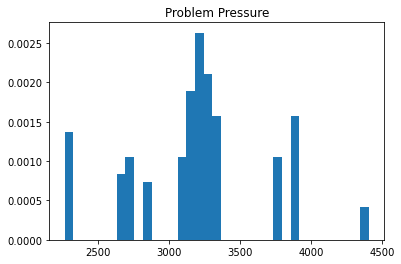

In [9]:
prob_press = np.array(prob_opgee.loc[(prob_opgee['Pressure'] < 10000), 'Pressure'])
plt.hist(prob_press, bins = 35, density = True)
plt.title('Problem Pressure')
plt.show()
prob_press = np.array(prob_opgee.loc[(prob_opgee['Pressure'] < 10000), 'Pressure'])
plt.hist(prob_press, bins = 35, density = True)
plt.title('Problem Pressure')
plt.show()

## 2.2 - Sensitivity Analysis

In this section high temperature and pressure are forcefully used, to check whether this leads to significant differences in terms of the output emissions.

In [21]:
inputs = pd.read_excel('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/field_data_for_opgee.xlsx')
prob_opgee = pd.read_csv('Pressure_Temperature_Problems.csv').drop('Unnamed: 0', axis = 1)
print(prob_opgee.shape)
all_fields = inputs[(inputs['id_field'].isin(prob_opgee['id_field'])) & (inputs['production'] != 0)].reset_index(drop = True)
print(all_fields.shape)
all_fields.head()

(155, 19)
(155, 17)


,year,field_name,country_name,field_age,field_depth,production,offshore,api,h2s,control_psi_temp,id_field,y_prod_start,y_prod_end,field_class_hp_ht,f_api__api,f_sulphur__prc,f_reservoir_depth__mtr
0,2001,Elgin,United Kingdom,0.0,17598.425781,54700.000000,1,44.099998,0.05,HP/HT,66,2001.0,2040.0,HP/HT,44.1,0.05,5364.0
1,2002,Elgin,United Kingdom,1.0,17598.425781,115380.000000,1,44.099998,0.05,HP/HT,66,2001.0,2040.0,HP/HT,44.1,0.05,5364.0
2,2003,Elgin,United Kingdom,2.0,17598.425781,125609.203125,1,44.099998,0.05,HP/HT,66,2001.0,2040.0,HP/HT,44.1,0.05,5364.0
3,2004,Elgin,United Kingdom,3.0,17598.425781,129274.796875,1,44.099998,0.05,HP/HT,66,2001.0,2040.0,HP/HT,44.1,0.05,5364.0
4,2005,Elgin,United Kingdom,4.0,17598.425781,109682.000000,1,44.099998,0.05,HP/HT,66,2001.0,2040.0,HP/HT,44.1,0.05,5364.0


In [22]:
#Only high pressure

n_fields = all_fields.shape[0]
running_times = []

xw.App(visible = False)
opgee_file = xw.books.open('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/OPGEE_3.0b_BETA.xlsm')
inputs_sheet = opgee_file.sheets('Inputs')
results_sheet = opgee_file.sheets('Results')
production_methods_default = inputs_sheet.range('G9:G17').value

for i in range(n_fields):
    col = all_letters[i]
    inputs_sheet.range(f'{col}9:{col}17').value = production_methods_default
    inputs_sheet.range(f'{col}20').value = all_fields.loc[i, 'country_name']
    inputs_sheet.range(f'{col}21').value = all_fields.loc[i, 'field_name']
    inputs_sheet.range(f'{col}22').value = all_fields.loc[i, 'field_age']
    inputs_sheet.range(f'{col}23').value = all_fields.loc[i, 'field_depth']
    inputs_sheet.range(f'{col}24').value = all_fields.loc[i, 'production']
    #Pressure
    inputs_sheet.range(f'{col}29').value = 10000
    inputs_sheet.range(f'{col}31').value = all_fields.loc[i, 'offshore']
    inputs_sheet.range(f'{col}34').value = all_fields.loc[i, 'api']
    inputs_sheet.range(f'{col}42').value = all_fields.loc[i, 'h2s']

inputs_sheet.range('C2').value = n_fields + 1

start_time = time.time()
trial_macro = opgee_file.macro('BulkAssessment.UltraBulk_assessment')
trial_macro()
end_time = time.time()
running_times.append((end_time - start_time)/60)

end_bound = all_letters[n_fields-1]
emissions = results_sheet.range(f'I193:{end_bound}193').value
all_fields['Pressure_Emission'] = emissions

opgee_file.close()

In [23]:
#Only high temperature

xw.App(visible = False)
opgee_file = xw.books.open('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/OPGEE_3.0b_BETA.xlsm')
inputs_sheet = opgee_file.sheets('Inputs')
results_sheet = opgee_file.sheets('Results')
production_methods_default = inputs_sheet.range('G9:G17').value

for i in range(n_fields):
    col = all_letters[i]
    inputs_sheet.range(f'{col}9:{col}17').value = production_methods_default
    inputs_sheet.range(f'{col}20').value = all_fields.loc[i, 'country_name']
    inputs_sheet.range(f'{col}21').value = all_fields.loc[i, 'field_name']
    inputs_sheet.range(f'{col}22').value = all_fields.loc[i, 'field_age']
    inputs_sheet.range(f'{col}23').value = all_fields.loc[i, 'field_depth']
    inputs_sheet.range(f'{col}24').value = all_fields.loc[i, 'production']
    #Temperature
    inputs_sheet.range(f'{col}30').value = 302
    inputs_sheet.range(f'{col}31').value = all_fields.loc[i, 'offshore']
    inputs_sheet.range(f'{col}34').value = all_fields.loc[i, 'api']
    inputs_sheet.range(f'{col}42').value = all_fields.loc[i, 'h2s']

inputs_sheet.range('C2').value = n_fields + 1

start_time = time.time()
trial_macro = opgee_file.macro('BulkAssessment.UltraBulk_assessment')
trial_macro()
end_time = time.time()
running_times.append((end_time - start_time)/60)

end_bound = all_letters[n_fields-1]
emissions = results_sheet.range(f'I193:{end_bound}193').value
all_fields['Temperature_Emission'] = emissions

opgee_file.close()

In [24]:
#Both high pressure and temperature

xw.App(visible = False)
opgee_file = xw.books.open('C:/Users/jing/Documents/Bocconi/DSBA/OPGEE/OPGEE_3.0b_BETA.xlsm')
inputs_sheet = opgee_file.sheets('Inputs')
results_sheet = opgee_file.sheets('Results')
production_methods_default = inputs_sheet.range('G9:G17').value

for i in range(n_fields):
    col = all_letters[i]
    inputs_sheet.range(f'{col}9:{col}17').value = production_methods_default
    inputs_sheet.range(f'{col}20').value = all_fields.loc[i, 'country_name']
    inputs_sheet.range(f'{col}21').value = all_fields.loc[i, 'field_name']
    inputs_sheet.range(f'{col}22').value = all_fields.loc[i, 'field_age']
    inputs_sheet.range(f'{col}23').value = all_fields.loc[i, 'field_depth']
    inputs_sheet.range(f'{col}24').value = all_fields.loc[i, 'production']
    #Pressure
    inputs_sheet.range(f'{col}29').value = 10000
    #Temperature
    inputs_sheet.range(f'{col}30').value = 302
    inputs_sheet.range(f'{col}31').value = all_fields.loc[i, 'offshore']
    inputs_sheet.range(f'{col}34').value = all_fields.loc[i, 'api']
    inputs_sheet.range(f'{col}42').value = all_fields.loc[i, 'h2s']

inputs_sheet.range('C2').value = n_fields + 1

start_time = time.time()
trial_macro = opgee_file.macro('BulkAssessment.UltraBulk_assessment')
trial_macro()
end_time = time.time()
running_times.append((end_time - start_time)/60)

end_bound = all_letters[n_fields-1]
emissions = results_sheet.range(f'I193:{end_bound}193').value
all_fields['Pressure_Temperature_Emission'] = emissions

opgee_file.close()

In [25]:
all_fields.to_csv('Sensitivity_OPGEE.csv')

In [26]:
running_times

[56.76379728317261, 56.807267944018044, 58.18112354278564]

In [35]:
sens_opgee = pd.read_csv('Sensitivity_OPGEE.csv').drop('Unnamed: 0', axis = 1)
opgee = pd.read_csv('OPGEE_Data.csv').drop('Unnamed: 0', axis = 1)
opgee = opgee[(opgee['field_name'].isin(sens_opgee['field_name'])) & (opgee['production'] > 0)].reset_index(drop = True)
print(opgee.shape)

(155, 9)


In [43]:
comp_opgee = pd.merge(sens_opgee, opgee, on = ['field_name', 'field_age'])
emis_cols = np.array([comp_opgee.columns[i] if 'Emission' in comp_opgee.columns[i] else '' for i in range(len(comp_opgee.columns))])
emis_cols = emis_cols[emis_cols != '']
comp_opgee = comp_opgee[emis_cols]
comp_opgee.head()

,Pressure_Emission,Temperature_Emission,Pressure_Temperature_Emission,Emission
0,6.158093,6.049479,6.158093,6.049479
1,6.165345,6.044268,6.165345,6.044268
2,6.178735,6.056054,6.178735,6.056025
3,6.192537,6.072467,6.192537,6.072737
4,6.207074,6.090466,6.207074,6.091018


In [59]:
for i in range(len(comp_opgee.columns)):
    col = comp_opgee.columns[i]
    if '_' in col:
        new_col = '_'.join(col.split('_')[:-1]) + '_Difference'
        comp_opgee[new_col] = comp_opgee['Emission'] - comp_opgee[col]
comp_opgee.head()

,Pressure_Emission,Temperature_Emission,Pressure_Temperature_Emission,Emission,Pressure_Difference,Temperature_Difference,Pressure_Temperature_Difference
0,6.158093,6.049479,6.158093,6.049479,-0.108614,0.000000,-0.108614
1,6.165345,6.044268,6.165345,6.044268,-0.121077,0.000000,-0.121077
2,6.178735,6.056054,6.178735,6.056025,-0.122710,-0.000029,-0.122710
3,6.192537,6.072467,6.192537,6.072737,-0.119800,0.000270,-0.119800
4,6.207074,6.090466,6.207074,6.091018,-0.116056,0.000552,-0.116056


As it's possible to see, the effect on the computed emissions is marginal:
- With high pressure, the difference is between -0.35 and -0.10.
- With high temperature, the difference is between -0.0010 and 0.0020.
- With both high temperature and pressure, the difference is between -0.35 and -0.10

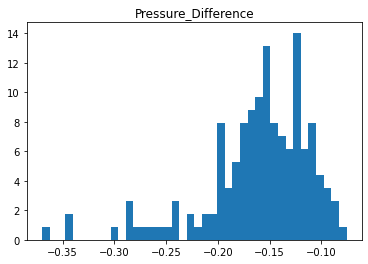

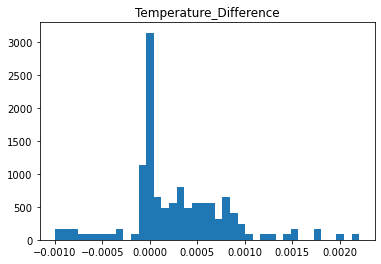

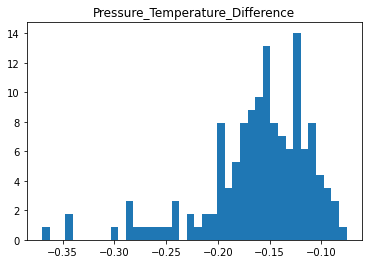

In [60]:
for i in range(len(comp_opgee.columns)):
    col = comp_opgee.columns[i]
    if 'Difference' in col:
        plt.hist(comp_opgee[col], bins = 40, density = True)
        plt.title(col)
        plt.show()

# 3 -  Emissions Predictions

The function cross_validation computes the mean squared error of the chosen model (which is by default a Random Forest), and it computes it through cross validation (by default 7-fold cross validation). 
If the used model is a Random Forest, then the function returns both the MSE and the features importances.

In [27]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [28]:
def cross_validation(x, y, n = 7, model = RandomForestRegressor()):
    sample = len(x)//n
    
    mean_importances = np.zeros(shape = x.shape[1])
    mses = []
    all_preds = np.zeros(shape = len(y))
    all_indexes = np.arange(len(x))

    for i in tqdm(range(n)):
        test_indexes = np.random.choice(all_indexes, size = sample, replace = False)
        train_indexes = [j for j in range(len(y)) if j not in test_indexes]
        train_x = x[train_indexes]
        test_x = x[test_indexes]

        train_y = y[train_indexes]
        test_y = y[test_indexes]

        model.fit(train_x, train_y)
        try:
            mean_importances += model.feature_importances_
        except:
            pass
        preds = model.predict(test_x)
        all_preds[len(test_x)*i:len(test_x)*(i+1)] = preds
        
        mse = mean_squared_error(test_y, preds)
        mses.append(mse)
                
        all_indexes = list(all_indexes)
        for index in test_indexes:
            all_indexes.remove(index)
        all_indexes = np.array(all_indexes)
        
    return np.array(mses), mean_importances/n

## 3.1 - Variables Analysis

In [15]:
opgee = pd.read_csv('OPGEE_Data.csv').drop('Unnamed: 0', axis = 1)
opgee = opgee.drop('field_name', axis = 1)
opgee = opgee[opgee['field_age'] >= 0].reset_index(drop = True)
print(opgee.shape)
opgee.head()

(6075, 8)


,country_name,field_age,field_depth,production,offshore,api,h2s,Emission
0,United Kingdom,0.0,6000.65625,44000.0,1,19.4,1.25,5.427825
1,United Kingdom,1.0,6000.65625,69500.0,1,19.4,1.25,5.419328
2,United Kingdom,2.0,6000.65625,69930.0,1,19.4,1.25,5.425938
3,United Kingdom,3.0,6000.65625,90865.0,1,19.4,1.25,5.433522
4,United Kingdom,4.0,6000.65625,80910.0,1,19.4,1.25,5.446432


The code below computes the number of unique values for each attribute.

In [5]:
print('Number of unique elements per attribute:')
for col in opgee.columns:
    print(f'{col}: {len(set(opgee[col]))}')
    if len(set(opgee[col])) == 1:
        opgee.drop(col, axis = 1, inplace = True)
        print(f'{col} removed')

Number of unique elements per attribute:
country_name: 2
field_age: 44
field_depth: 254
production: 5093
offshore: 1
offshore removed
api: 1510
h2s: 2335
Emission: 6066


Due to the existence of significant emissions outliers which may compromise learning, the emissions have first been winsorized, the distribution of which is displayed below.

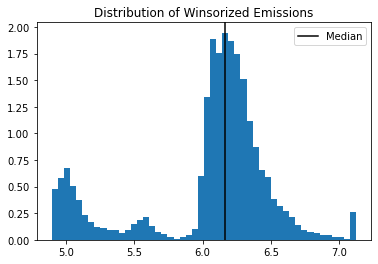

In [17]:
emissions = np.array(opgee['Emission'])
w_emissions = winsorize(emissions, limits = [0.01, 0.01])
plt.hist(w_emissions, bins = 50, density = True)
plt.axvline(np.median(w_emissions), color = 'black', label = 'Median')
plt.title('Distribution of Winsorized Emissions')
plt.legend()
plt.show()

The code below generates the dummy variable united_kingdom, which is equal to 1 if the country is the UK (given that in this dataset there exist only two countries).

In [18]:
opgee['Winsorized Emission'] = w_emissions
opgee['united_kingdom'] = opgee.apply(lambda x: 1 if x['country_name'] == 'United Kingdom' else 0, axis = 1)
opgee.head()

,country_name,field_age,field_depth,production,offshore,api,h2s,Emission,Winsorized Emission,united_kingdom
0,United Kingdom,0.0,6000.65625,44000.0,1,19.4,1.25,5.427825,5.427825,1
1,United Kingdom,1.0,6000.65625,69500.0,1,19.4,1.25,5.419328,5.419328,1
2,United Kingdom,2.0,6000.65625,69930.0,1,19.4,1.25,5.425938,5.425938,1
3,United Kingdom,3.0,6000.65625,90865.0,1,19.4,1.25,5.433522,5.433522,1
4,United Kingdom,4.0,6000.65625,80910.0,1,19.4,1.25,5.446432,5.446432,1


The code below displays the distribution of the quantitative variables in the dataset.

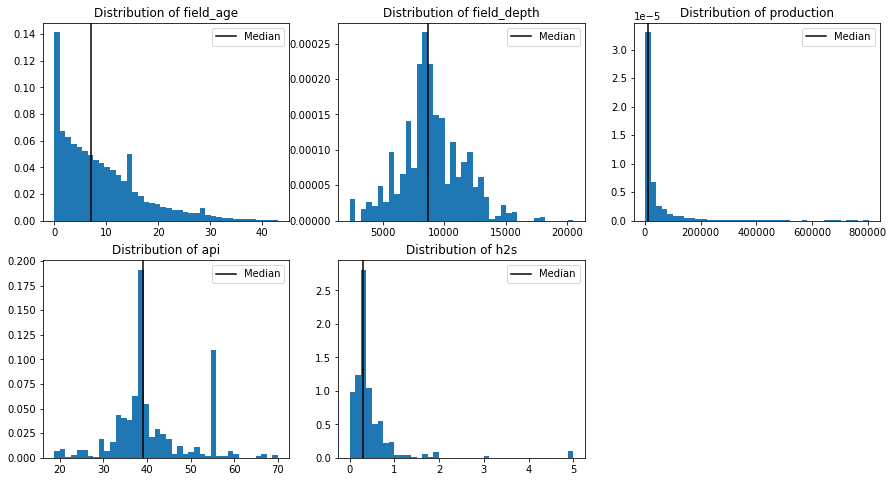

In [19]:
quant_cols = ['field_age', 'field_depth', 'production', 'api', 'h2s']
plt.figure(figsize = (15,8))
i = 1
for col in quant_cols:
    variables = opgee.loc[opgee[col].notnull(), col]
    plt.subplot(2,3,i)
    plt.hist(variables, bins = 40, density = True)
    plt.axvline(np.median(variables), color = 'black', label = 'Median')
    plt.legend()
    plt.title(f'Distribution of {col}')
    i += 1

plt.show()

## 3.2 -  Missing Values

In [96]:
for col in opgee.columns:
    if opgee[col].isnull().any():
        null_perc = opgee[opgee[col].isnull()].shape[0]*100/opgee.shape[0]
        print(f'Null values of {col}: {null_perc}%')

Null values of api: 23.292181069958847%
Null values of h2s: 37.218106995884774%


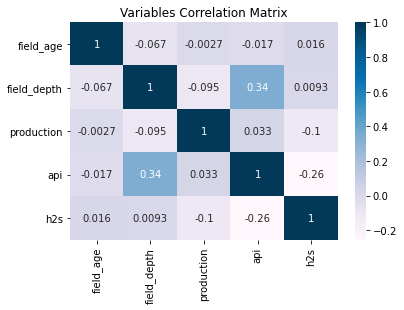

In [105]:
corr_matrix = opgee.loc[(opgee['api'].notnull()) & (opgee['h2s'].notnull()), quant_cols].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'PuBu')
plt.title('Variables Correlation Matrix')
plt.show()

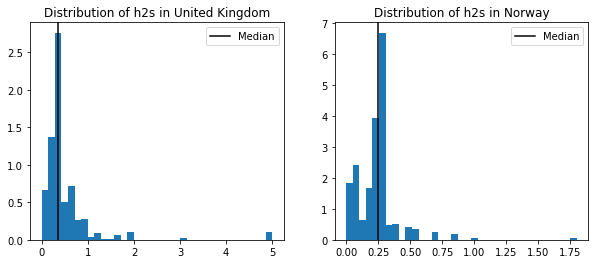

In [20]:
uk_h2s = np.array(opgee.loc[(opgee['country_name'] == 'United Kingdom') & (opgee['h2s'].notnull()), 'h2s'])
nor_h2s = np.array(opgee.loc[(opgee['country_name'] == 'Norway') & (opgee['h2s'].notnull()), 'h2s'])

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.hist(uk_h2s, bins = 35, density = True)
plt.axvline(np.median(uk_h2s), color = 'black', label = 'Median')
plt.legend()
plt.title('Distribution of h2s in United Kingdom')
#plt.show()

plt.subplot(1,2,2)
plt.hist(nor_h2s, bins = 35, density = True)
plt.axvline(np.median(nor_h2s), color = 'black', label = 'Median')
plt.legend()
plt.title('Distribution of h2s in Norway')
plt.show()

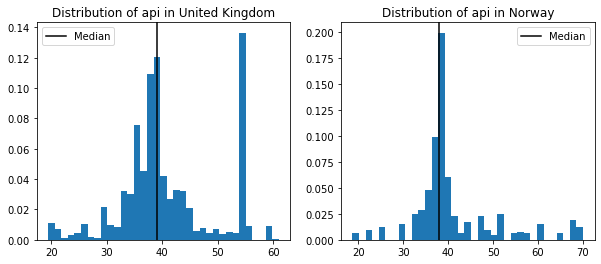

In [134]:
uk_api = np.array(opgee.loc[(opgee['country_name'] == 'United Kingdom') & (opgee['api'].notnull()), 'api'])
nor_api = np.array(opgee.loc[(opgee['country_name'] == 'Norway') & (opgee['api'].notnull()), 'api'])

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.hist(uk_api, bins = 35, density = True)
plt.axvline(np.median(uk_api), color = 'black', label = 'Median')
plt.legend()
plt.title('Distribution of api in United Kingdom')
#plt.show()

plt.subplot(1,2,2)
plt.hist(nor_api, bins = 35, density = True)
plt.axvline(np.median(nor_api), color = 'black', label = 'Median')
plt.legend()
plt.title('Distribution of api in Norway')
plt.show()

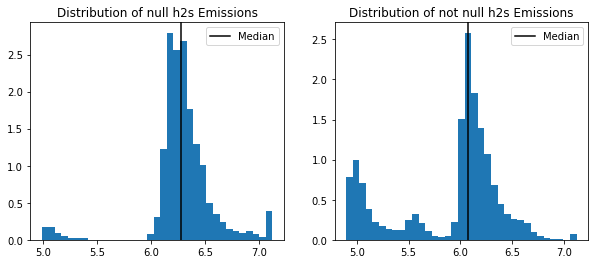

In [9]:
# Check whether emissions are correlated with missing values: h2s

null_h2s_emissions = np.array(opgee.loc[opgee['h2s'].isnull(), 'Winsorized Emission'])
not_null_h2s_emissions = np.array(opgee.loc[opgee['h2s'].notnull(), 'Winsorized Emission'])

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.hist(null_h2s_emissions, bins = 35, density = True)
plt.axvline(np.median(null_h2s_emissions), color = 'black', label = 'Median')
plt.legend()
plt.title('Distribution of null h2s Emissions')
#plt.show()

plt.subplot(1,2,2)
plt.hist(not_null_h2s_emissions, bins = 35, density = True)
plt.axvline(np.median(not_null_h2s_emissions), color = 'black', label = 'Median')
plt.legend()
plt.title('Distribution of not null h2s Emissions')
plt.show()

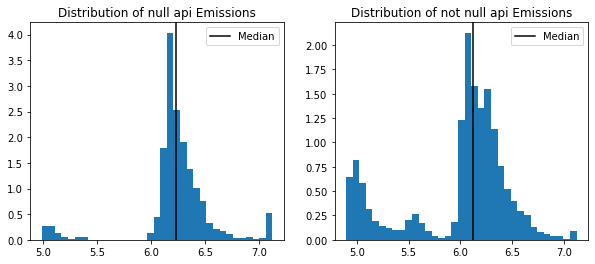

In [10]:
# Check whether emissions are correlated with missing values: api

null_api_emissions = np.array(opgee.loc[opgee['api'].isnull(), 'Winsorized Emission'])
not_null_api_emissions = np.array(opgee.loc[opgee['api'].notnull(), 'Winsorized Emission'])

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.hist(null_api_emissions, bins = 35, density = True)
plt.axvline(np.median(null_api_emissions), color = 'black', label = 'Median')
plt.legend()
plt.title('Distribution of null api Emissions')
#plt.show()

plt.subplot(1,2,2)
plt.hist(not_null_api_emissions, bins = 35, density = True)
plt.axvline(np.median(not_null_api_emissions), color = 'black', label = 'Median')
plt.legend()
plt.title('Distribution of not null api Emissions')
plt.show()

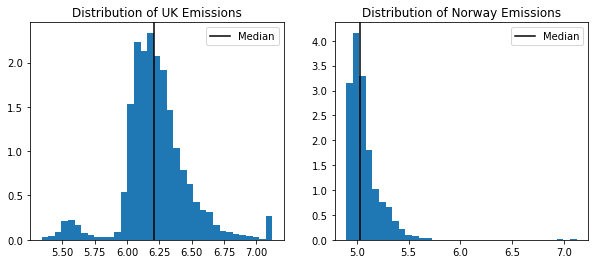

In [22]:
# Check the difference between UK and Norway emissions

uk_h2s_emissions = np.array(opgee.loc[opgee['united_kingdom'] == 1, 'Winsorized Emission'])
not_uk_h2s_emissions = np.array(opgee.loc[opgee['united_kingdom'] == 0, 'Winsorized Emission'])

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.hist(uk_h2s_emissions, bins = 35, density = True)
plt.axvline(np.median(uk_h2s_emissions), color = 'black', label = 'Median')
plt.legend()
plt.title('Distribution of UK Emissions')
#plt.show()

plt.subplot(1,2,2)
plt.hist(not_uk_h2s_emissions, bins = 35, density = True)
plt.axvline(np.median(not_uk_h2s_emissions), color = 'black', label = 'Median')
plt.legend()
plt.title('Distribution of Norway Emissions')
plt.show()

In [140]:
#Filling the missing values - Median

opgee.loc[opgee['h2s'].isnull(), 'h2s'] = np.median(opgee.loc[opgee['h2s'].notnull(), 'h2s'])
opgee.loc[opgee['api'].isnull(), 'api'] = np.median(opgee.loc[opgee['api'].notnull(), 'api'])
opgee['united_kingdom'] = opgee.apply(lambda x: 1 if x['country_name'] == 'United Kingdom' else 0, axis = 1)
opgee['norway'] = opgee.apply(lambda x: 1 if x['country_name'] == 'Norway' else 0, axis = 1)
opgee.head()

,country_name,field_age,field_depth,production,api,h2s,Emission,Winsorized Emission,united_kingdom,norway
0,United Kingdom,0.0,6000.65625,44000.0,19.4,1.25,5.427825,5.427825,1,0
1,United Kingdom,1.0,6000.65625,69500.0,19.4,1.25,5.419328,5.419328,1,0
2,United Kingdom,2.0,6000.65625,69930.0,19.4,1.25,5.425938,5.425938,1,0
3,United Kingdom,3.0,6000.65625,90865.0,19.4,1.25,5.433522,5.433522,1,0
4,United Kingdom,4.0,6000.65625,80910.0,19.4,1.25,5.446432,5.446432,1,0


To fill in the missing values of h2s, a Random Forest is used; given the low MSE, the strategy is successful.

In [70]:
# Prediction of null values: h2s

opgee['united_kingdom'] = opgee.apply(lambda x: 1 if x['country_name'] == 'United Kingdom' else 0, axis = 1)
opgee_notnull_h2s = opgee[opgee['h2s'].notnull()].reset_index(drop = True)
x = opgee_notnull_h2s.loc[:, ['field_age', 'field_depth', 'production','united_kingdom']]
x = np.array(x).reshape(-1, 4)
y = opgee_notnull_h2s['h2s']

mses_1, importances_1 = cross_validation(x,y)
print(f'Mean MSE: {mses_1.mean()}')
print(f'Std MSE: {mses_1.std()}')

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]

Mean MSE: 0.07746157668380968
Std MSE: 0.02698633971662819


To fill in the missing values of api, Random Forest proves to be the most effective algorithm.

In [40]:
# Prediction of null values: api

opgee_notnull_api = opgee[opgee['api'].notnull()].reset_index(drop = True)
x = opgee_notnull_api.loc[:, ['field_age', 'field_depth', 'production','united_kingdom']]
x = np.array(x).reshape(-1, 4)
y = opgee_notnull_api['api']

mses_1, importances_1 = cross_validation(x,y)
print('Model: Random Forest')
print(f'Mean MSE: {mses_1.mean()}')
print(f'Std MSE: {mses_1.std()}')

mses_1, importances_1 = cross_validation(x,y, model = KNeighborsRegressor())
print('Model: KNN')
print(f'Mean MSE: {mses_1.mean()}')
print(f'Std MSE: {mses_1.std()}')

mses_1, importances_1 = cross_validation(x,y, model = BaggingRegressor())
print('Model: Bagging')
print(f'Mean MSE: {mses_1.mean()}')
print(f'Std MSE: {mses_1.std()}')

 14%|████████████                                                                        | 1/7 [00:00<00:00,  7.46it/s]

Model: Random Forest
Mean MSE: 13.608805969361702
Std MSE: 2.264995273596783


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Model: KNN
Mean MSE: 70.38903480194035
Std MSE: 4.256245185373581


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]

Model: Bagging
Mean MSE: 15.00260626714183
Std MSE: 2.4058709912504104


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:41<00:00,  5.90s/it]


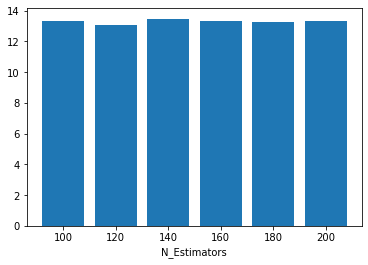

In [56]:
# Random Forest for different numbers of estimators

all_mses = []
n_estimators = np.arange(100,201,20)
for i in range(len(n_estimators)):
    mses_1, importances_1 = cross_validation(x,y, model = RandomForestRegressor(n_estimators = n_estimators[i]))
    all_mses.append(mses_1.mean())
                                             
plt.bar([str(n_estimators[i]) for i in range(len(n_estimators))], all_mses)
plt.xlabel('N_Estimators')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:10<00:00,  1.49s/it]


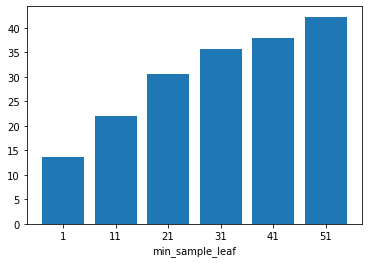

In [59]:
#Random Forest for different leaf sizes

all_mses = []
min_sample_leaf = np.arange(1,52,10)
for i in range(len(n_estimators)):
    mses_1, importances_1 = cross_validation(x,y, model = RandomForestRegressor(min_samples_leaf = min_sample_leaf[i]))
    all_mses.append(mses_1.mean())
                                             
plt.bar([str(min_sample_leaf[i]) for i in range(len(min_sample_leaf))], all_mses)
plt.xlabel('min_sample_leaf')
plt.show()

After verifying the most effective ML algorithms, the missing values of h2s and api are filled in.

In [71]:
# Filling Missing Values with ML predictions

model = RandomForestRegressor()
opgee_notnull_api = opgee[opgee['api'].notnull()].reset_index(drop = True)
x = opgee_notnull_api.loc[:, ['field_age', 'field_depth', 'production','united_kingdom']]
x = np.array(x).reshape(-1, 4)
y = np.array(opgee_notnull_api['api'])
model.fit(x,y)

new_x = np.array(opgee.loc[opgee['api'].isnull(), ['field_age', 'field_depth', 'production','united_kingdom']]).reshape(-1,4)
new_api = model.predict(new_x)
opgee.loc[opgee['api'].isnull(), 'api'] = new_api

model = RandomForestRegressor()
opgee_notnull_h2s = opgee[opgee['h2s'].notnull()].reset_index(drop = True)
x = opgee_notnull_h2s.loc[:, ['field_age', 'field_depth', 'production','united_kingdom']]
x = np.array(x).reshape(-1, 4)
y = np.array(opgee_notnull_h2s['h2s'])
model.fit(x,y)

new_x = np.array(opgee.loc[opgee['h2s'].isnull(), ['field_age', 'field_depth', 'production','united_kingdom']]).reshape(-1, 4)
new_h2s = model.predict(new_x)
opgee.loc[opgee['h2s'].isnull(), 'h2s'] = new_h2s

## 3.3 - Random Forest

In this section, Random Forest is run for emissions predictions, using the obtained training set in the previous sections.
Random Forest with default values proves to be the most accurate algorithm, with MSE equal to 0.002. 

In [23]:
opgee = pd.read_csv('OPGEE_Training_Data.csv').drop('Unnamed: 0', axis = 1)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.91s/it]


Mean MSE: 0.0021424582852625352
Std MSE: 0.0005572575744657374


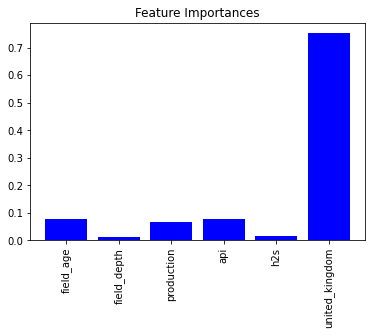

In [29]:
#All Regressors - Random Forest

x = opgee.loc[:, ['field_age', 'field_depth', 'production', 'api', 'h2s', 'united_kingdom']]
x = np.array(x).reshape(-1, 6)
y = opgee['Winsorized Emission']

mses_1, importances_1 = cross_validation(x,y)
print(f'Mean MSE: {mses_1.mean()}')
print(f'Std MSE: {mses_1.std()}')

plt.bar(['field_age', 'field_depth', 'production', 'api', 'h2s', 'united_kingdom'], importances_1, color = 'blue')
plt.xticks(rotation = 90)
plt.title('Feature Importances')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:22<00:00,  3.20s/it]


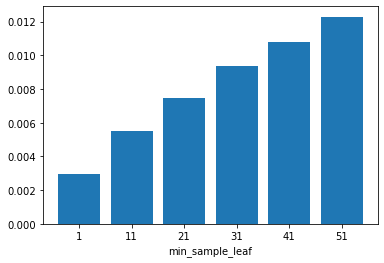

In [109]:
#Random forest for different leaf sizes

all_mses = []
min_sample_leaf = np.arange(1,52,10)
for i in range(len(min_sample_leaf)):
    mses_1, importances_1 = cross_validation(x,y, model = RandomForestRegressor(min_samples_leaf = min_sample_leaf[i]))
    all_mses.append(mses_1.mean())
                                             
plt.bar([str(min_sample_leaf[i]) for i in range(len(min_sample_leaf))], all_mses)
plt.xlabel('min_sample_leaf')
plt.show()

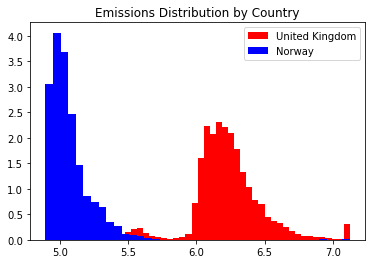

In [196]:
#Distributions by country name

plt.hist(opgee.loc[opgee['country_name'] == 'United Kingdom', 'Winsorized Emission'], bins = 40, density = True, color = 'red', label = 'United Kingdom')
plt.hist(opgee.loc[opgee['country_name'] == 'Norway', 'Winsorized Emission'], bins = 40, density = True, color = 'blue', label = 'Norway')
plt.legend()
plt.title('Emissions Distribution by Country')
plt.show()

Given that the country plays an important role for prediction purposes, it is possible to run a Random Forest without such variable, to evaluate the relative importance of the remaining attributes.

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:47<00:00,  6.82s/it]


Mean MSE: 0.021119774473781622
Std MSE: 0.003510024441941696


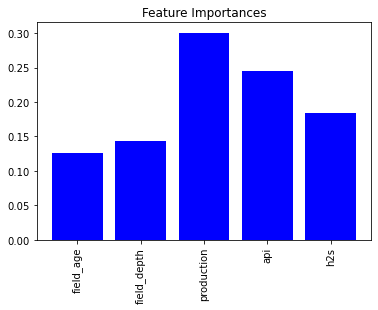

In [103]:
# Without country name

x = opgee.loc[:, ['field_age', 'field_depth', 'production', 'api', 'h2s']]
x = np.array(x).reshape(-1, 5)
y = opgee['Winsorized Emission']

mses_1, importances_1 = cross_validation(x,y)

print(f'Mean MSE: {mses_1.mean()}')
print(f'Std MSE: {mses_1.std()}')

plt.bar(['field_age', 'field_depth', 'production', 'api', 'h2s'], importances_1, color = 'blue')
plt.xticks(rotation = 90)
plt.title('Feature Importances')
plt.show()

## Neural Network

In [9]:
opgee = pd.read_csv('OPGEE_Training_Data.csv').drop('Unnamed: 0', axis = 1)
x = opgee.loc[:, ['field_age', 'field_depth', 'production', 'api', 'h2s', 'united_kingdom']]
x = np.array(x).reshape(-1, 6)
y = opgee['Winsorized Emission']

In [89]:
# All Regressors - MLP

mses_1, importances_1 = cross_validation(x,y, model = MLPRegressor(hidden_layer_sizes = (150,), activation = 'logistic'))
print(f'Mean MSE: {mses_1.mean()}')
print(f'Std MSE: {mses_1.std()}')

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:24<00:00,  3.55s/it]

Mean MSE: 0.1844428289835062
Std MSE: 0.006286165047951502


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:30<00:00,  4.31s/it]


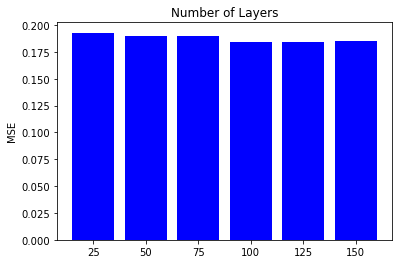

In [17]:
n_layers = (25, 50, 75, 100, 125, 150)
all_mses = []

for n in n_layers:
    mses_1 = cross_validation(x,y, model = MLPRegressor(hidden_layer_sizes = (n,), activation = 'logistic'))[0]
    all_mses.append(mses_1.mean())

plt.bar([str(n) for n in n_layers], all_mses, color = 'blue')
plt.title('Number of Layers')
plt.ylabel('MSE')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:30<00:00, 12.90s/it]


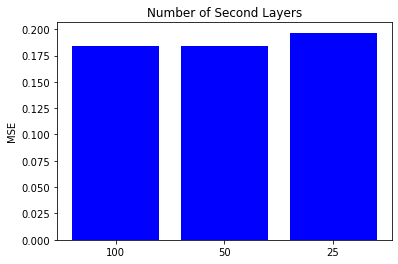

In [10]:
n_layers = (100, 50, 25)
all_mses = []

for n in n_layers:
    mses_1 = cross_validation(x,y, model = MLPRegressor(hidden_layer_sizes = (150,n), activation = 'logistic'))[0]
    all_mses.append(mses_1.mean())

plt.bar([str(n) for n in n_layers], all_mses, color = 'blue')
plt.title('Number of Second Layers')
plt.ylabel('MSE')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:35<00:00, 22.24s/it]


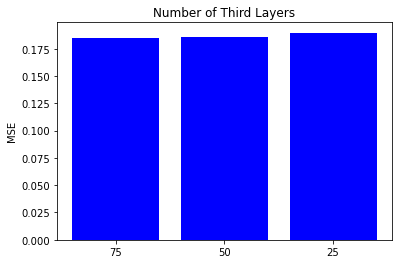

In [11]:
n_layers = (75, 50, 25)
all_mses = []

for n in n_layers:
    mses_1 = cross_validation(x,y, model = MLPRegressor(hidden_layer_sizes = (150,100,n), activation = 'logistic'))[0]
    all_mses.append(mses_1.mean())

plt.bar([str(n) for n in n_layers], all_mses, color = 'blue')
plt.title('Number of Third Layers')
plt.ylabel('MSE')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:31<00:00, 13.14s/it]


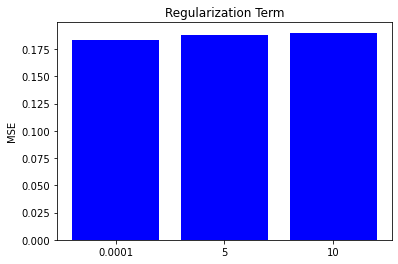

In [16]:
alphas = [0.0001, 5, 10]
all_mses = []

for alpha in alphas:
    mses_1 = cross_validation(x,y, model = MLPRegressor(hidden_layer_sizes = (150,), activation = 'logistic', alpha = alpha))[0]
    all_mses.append(mses_1.mean())

plt.bar([str(alpha) for alpha in alphas], all_mses, color = 'blue')
plt.title('Regularization Term')
plt.ylabel('MSE')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:24<00:00,  3.51s/it]


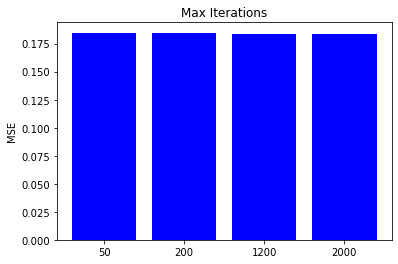

In [22]:
max_iters = [50,200, 1200, 2000]
all_mses = []

for max_iter in max_iters:
    mses_1 = cross_validation(x,y, model = MLPRegressor(hidden_layer_sizes = (150,), activation = 'logistic', max_iter = max_iter))[0]
    all_mses.append(mses_1.mean())

plt.bar([str(max_iter) for max_iter in max_iters], all_mses, color = 'blue')
plt.title('Max Iterations')
plt.ylabel('MSE')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:01<00:00,  8.82s/it]


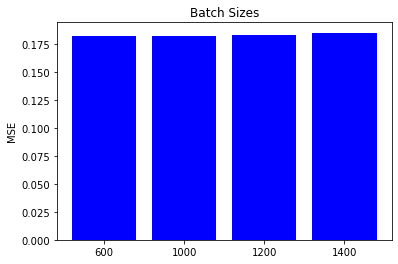

In [24]:
batch_sizes = [600, 1000, 1200, 1400]
all_mses = []

for batch_size in batch_sizes:
    mses_1 = cross_validation(x,y, model = MLPRegressor(hidden_layer_sizes = (150,), activation = 'logistic', batch_size = batch_size))[0]
    all_mses.append(mses_1.mean())

plt.bar([str(batch_size) for batch_size in batch_sizes], all_mses, color = 'blue')
plt.title('Batch Sizes')
plt.ylabel('MSE')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [11:04<00:00, 94.98s/it]


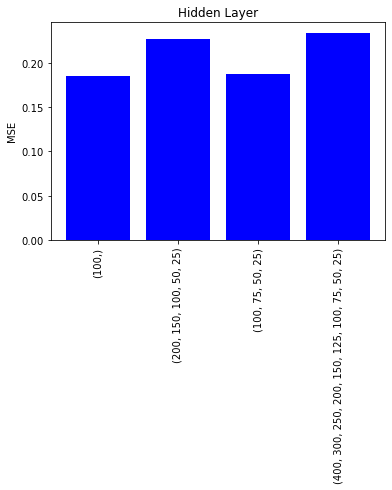

In [25]:
hidden_layers = [(100,), (200, 150, 100, 50, 25), (100, 75, 50, 25), (400, 300, 250, 200, 150, 125, 100, 75, 50, 25)]
all_mses = []

for hidden_layer in hidden_layers:
    mses_1 = cross_validation(x,y, model = MLPRegressor(hidden_layer_sizes = hidden_layer, activation = 'logistic'))[0]
    all_mses.append(mses_1.mean())

plt.bar([str(hidden_layer) for hidden_layer in hidden_layers], all_mses, color = 'blue')
plt.xticks(rotation = 90)
plt.title('Hidden Layer')
plt.ylabel('MSE')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:30<00:00,  4.34s/it]


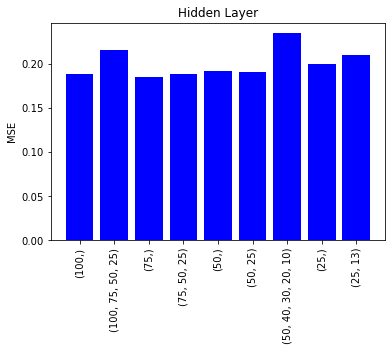

In [29]:
hidden_layers = [(100,), (100, 75, 50, 25,), (75,), (75, 50, 25,), (50,), (50,25,),(50,40,30,20,10), (25,), (25,13,)]
all_mses = []

for hidden_layer in hidden_layers:
    mses_1 = cross_validation(x,y, model = MLPRegressor(hidden_layer_sizes = hidden_layer, activation = 'logistic'))[0]
    all_mses.append(mses_1.mean())

plt.bar([str(hidden_layer) for hidden_layer in hidden_layers], all_mses, color = 'blue')
plt.xticks(rotation = 90)
plt.title('Hidden Layer')
plt.ylabel('MSE')
plt.show()